**Meta DataSet(About Dataset)**
**Context**  
"Tips" data set  is a collection of restaurant bills where patrons have left tips for the service they received. It provides valuable insights into tipping behavior based on various factors such as total bill amount, gender, whether the patron smokes, day of the week, time of day, and party size.

# **Overview of each column:**  

**total_bill:** The total bill amount, including food and drinks, before tips.  
**tip:** The amount left as a tip by the patron.  
**sex:** Gender of the patron (male or female).  
**smoker:** Indicates whether the patron is a smoker (Yes or No).  
**day:**The day of the week when the meal was consumed (e.g., Thursday, Friday, etc.).  
**time:**Indicates whether the meal was served during lunch or dinner.  
**size:** The size of the dining party.  

Each column provides valuable information for understanding tipping behavior and can be analyzed to uncover insights such as average tip amounts, tipping trends based on gender or smoking status, differences in tipping behavior between lunch and dinner, and how party size influences tipping. By exploring and analyzing this dataset, researchers and analysts can gain a deeper understanding of tipping behavior and its underlying factors.

**Import the library**

In [76]:
#Import the data cleaning library
import numpy as np
import pandas as pd
#import the data visulisation 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Preprocessing matrics
from sklearn.preprocessing import LabelEncoder,MaxAbsScaler,MinMaxScaler,StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor

#Remove the warning
import warnings
warnings.filterwarnings("ignore")

**Load the dataset**

In [77]:
data_tips=sns.load_dataset("tips")
#Print the first five rows
data_tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Data Exploration and Preprocessing:**

In [78]:
#Print the shape  of dataset
data_tips.shape

(244, 7)

In [79]:
#Print the information about the data set
data_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [80]:
#Print the missing values
data_tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

**Let's Handling the outliers**

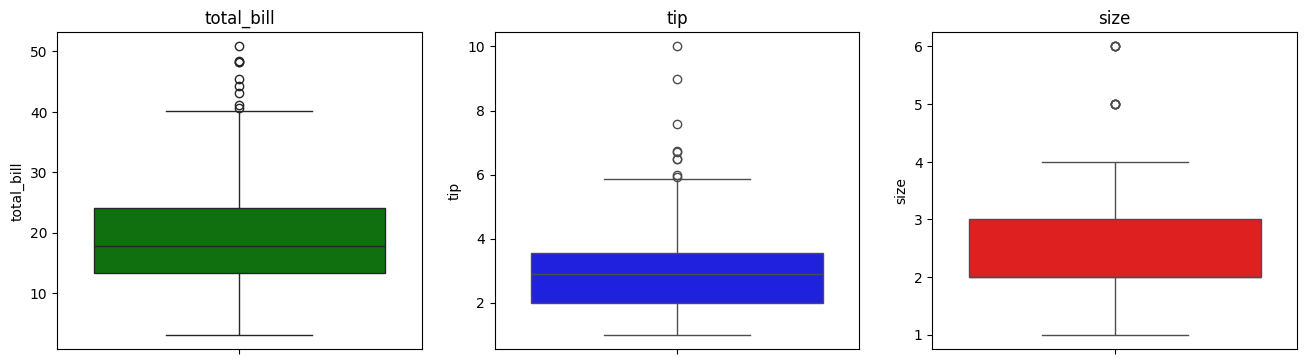

In [81]:
#Check the outliers in numerical columns
plt.figure(figsize=(16,14))
col=['green', 'blue', 'red']
for i,j in enumerate(data_tips.select_dtypes(include="number")):
    plt.subplot(3,3,i+1)
    sns.boxplot(data_tips[j],color=col[i])
    plt.title(j)

In [82]:
#create a function to remove the outlier
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    innerquartilerange=q3-q1
    loweroutlier=q1-1.5*innerquartilerange
    upperoutlier=q3+1.5*innerquartilerange
    return loweroutlier,upperoutlier



for i in [ 'total_bill', 'tip', 'size']:
    loweroutlier,upperoutier=wisker(data_tips[i])
    data_tips[i]=np.where(data_tips[i]<loweroutlier,loweroutlier,data_tips[i]) #If less than lower outlier then fill it loweroutlier or as it
    data_tips[i]=np.where(data_tips[i]>upperoutier,upperoutier,data_tips[i])

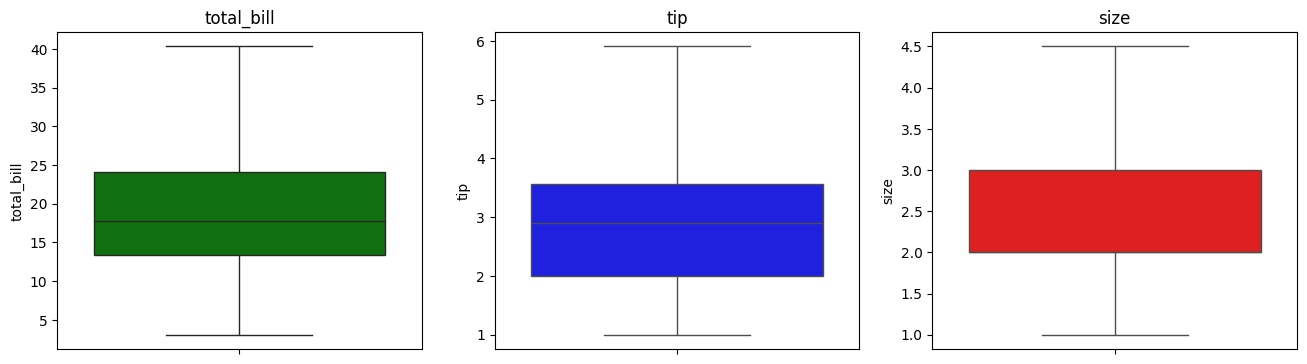

In [83]:
#Check the outliers are removed numerical columns
plt.figure(figsize=(16,14))
col=['green', 'blue', 'red']
for i,j in enumerate(data_tips.select_dtypes(include="number")):
    plt.subplot(3,3,i+1)
    sns.boxplot(data_tips[j],color=col[i])
    plt.title(j)

**LabelEncoding to text to number**

In [84]:
for i in data_tips.select_dtypes(include="category").columns:
    data_tips[i]=LabelEncoder().fit_transform(data_tips[i])

# Exploratory data analysis (EDA)

# Let's compare the total bill vs other column

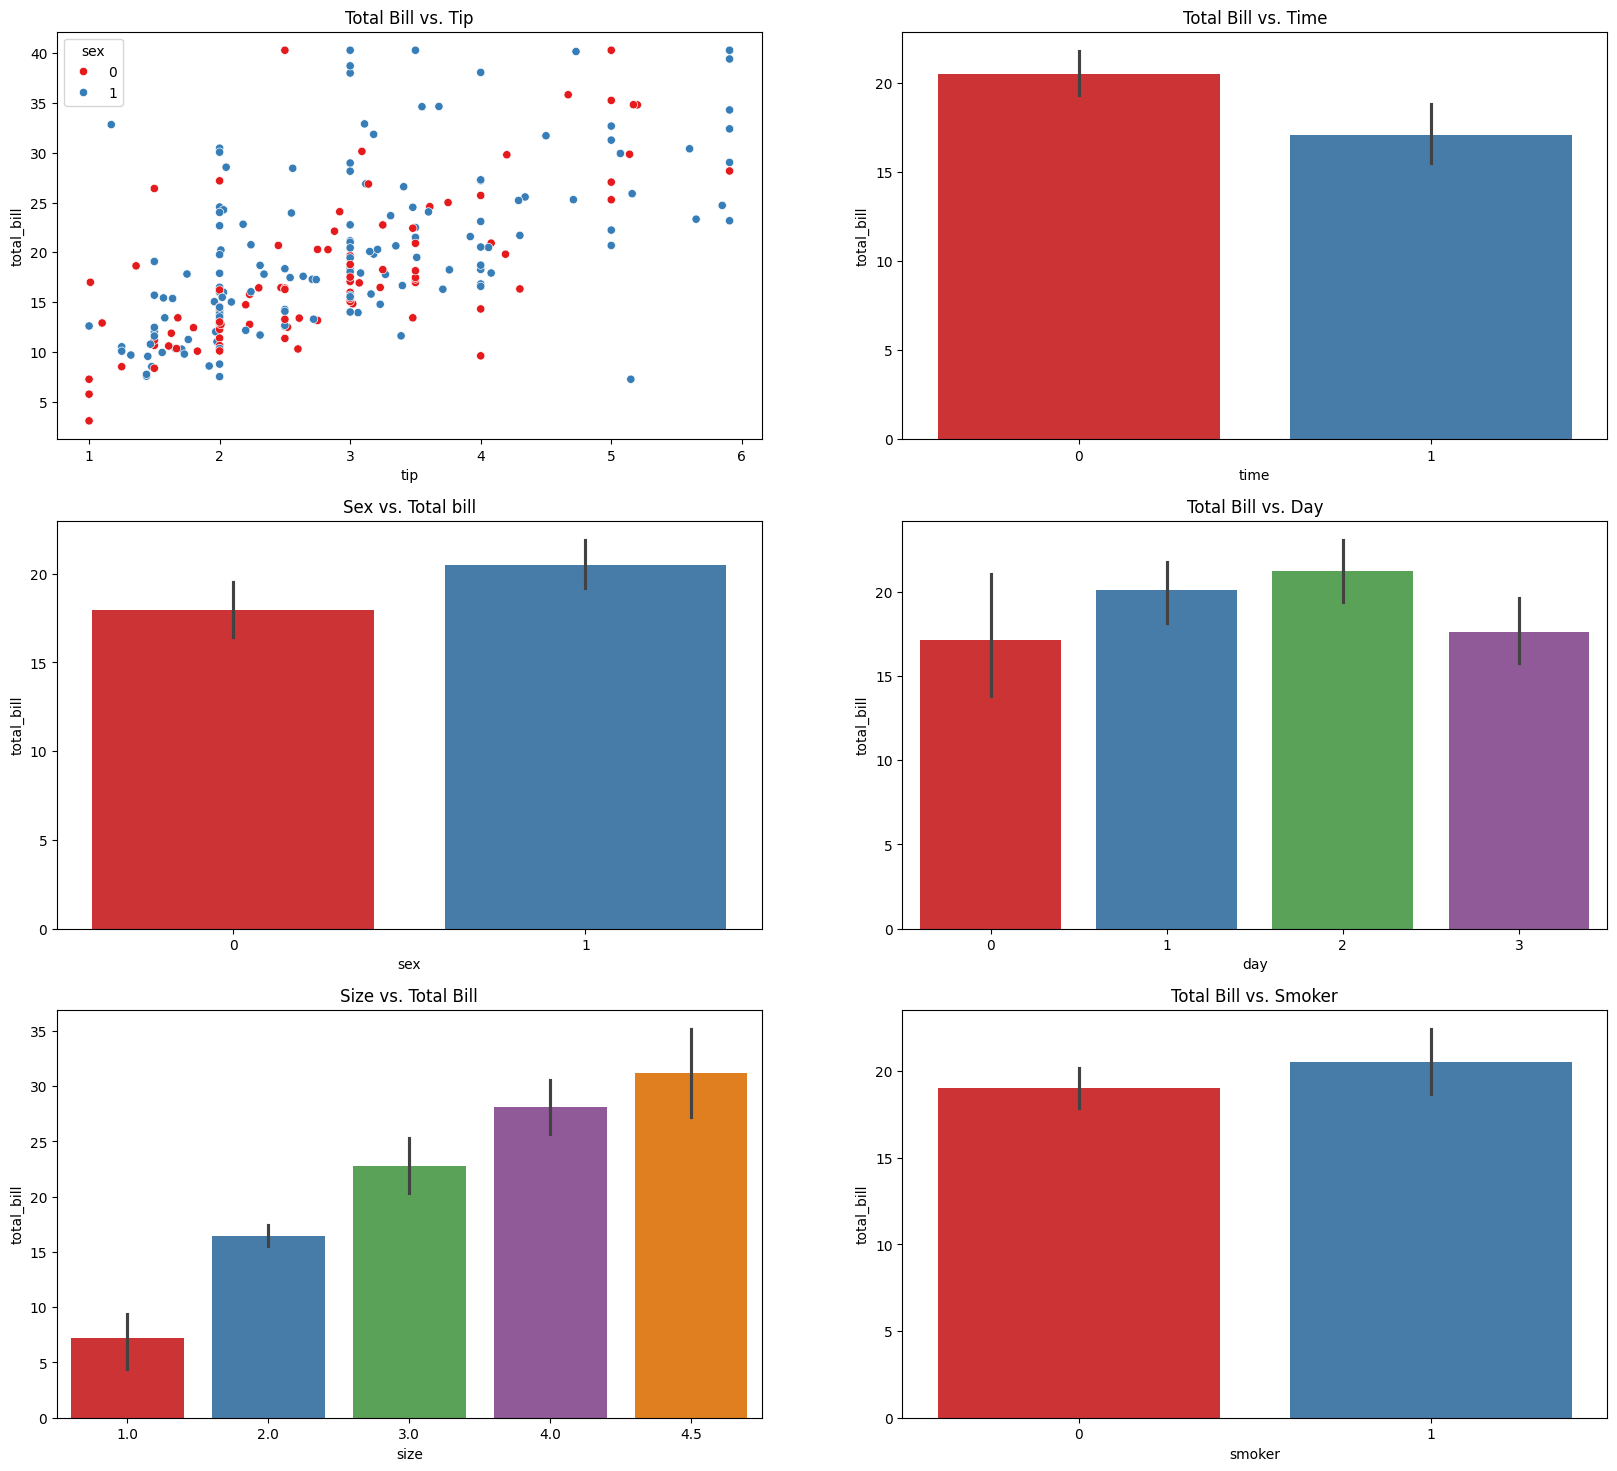

In [85]:
# Set up the figure and axes
plt.figure(figsize=(20, 18))
# Total Bill vs. Tip
plt.subplot(3, 2, 1)
sns.scatterplot(x='tip', y='total_bill', data=data_tips, hue='sex', palette='Set1')
plt.title('Total Bill vs. Tip')

# Total Bill vs. Time
plt.subplot(3, 2, 2)
sns.barplot(x='time', y='total_bill', data=data_tips, palette='Set1')
plt.title('Total Bill vs. Time')

# Tip vs. Time
plt.subplot(3, 2, 3)
sns.barplot(x='sex', y='total_bill', data=data_tips, palette='Set1')
plt.title('Sex vs. Total bill')

# Total Bill vs. Day
plt.subplot(3, 2, 4)
sns.barplot(x='day', y='total_bill', data=data_tips, palette='Set1')
plt.title('Total Bill vs. Day')

# Tip vs. Day
plt.subplot(3, 2, 5)
sns.barplot(x='size', y='total_bill', data=data_tips, palette='Set1')
plt.title('Size vs. Total Bill')

# Total Bill vs. Smoker
plt.subplot(3, 2, 6)
sns.barplot(x='smoker', y='total_bill', data=data_tips, palette='Set1')
plt.title('Total Bill vs. Smoker')

plt.show()


# Let's compare the tips vs other columnsn

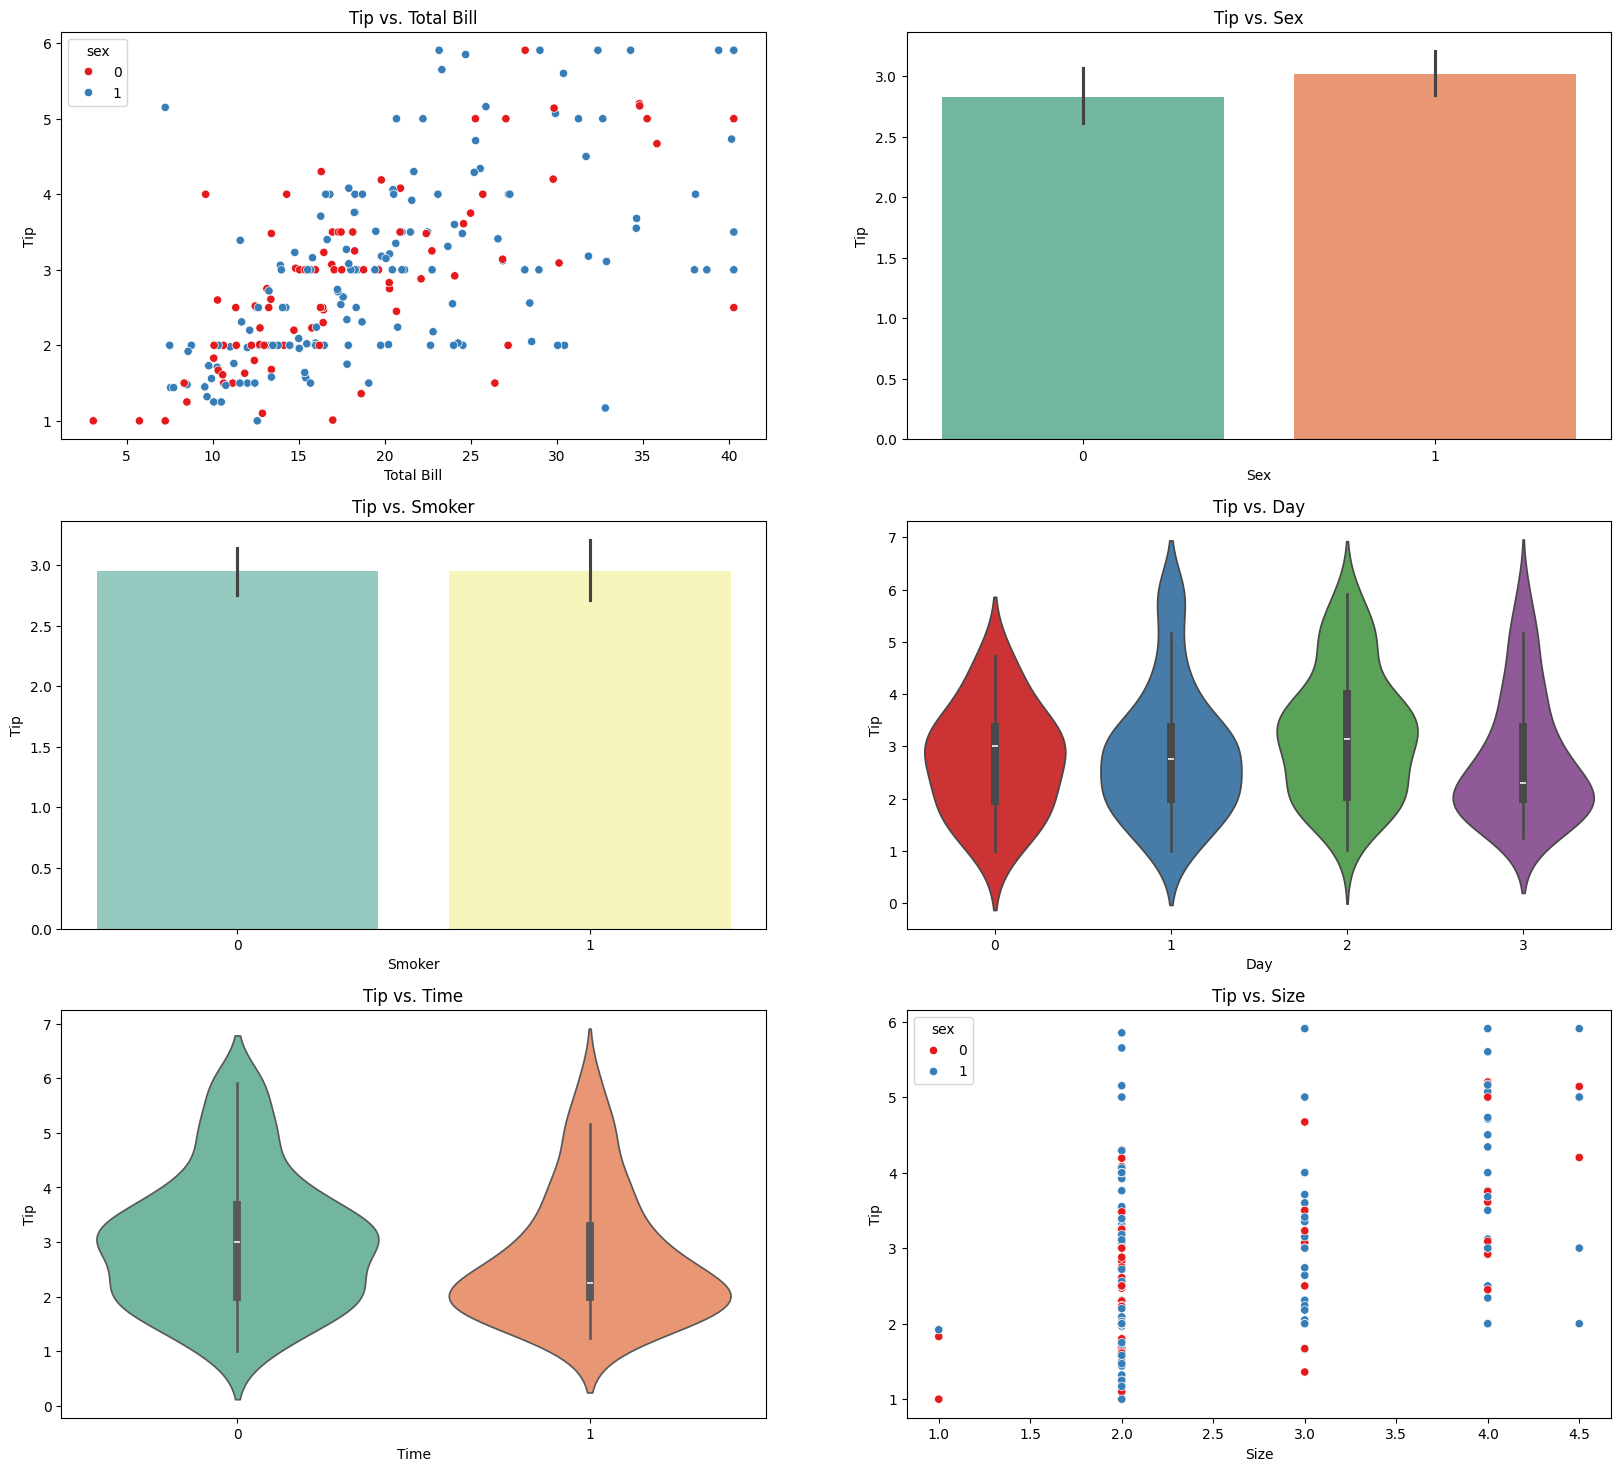

In [86]:
# Set up the figure and axes
plt.figure(figsize=(20, 18))

# Tip vs. Total Bill
plt.subplot(3, 2, 1)
sns.scatterplot(x='total_bill', y='tip', data=data_tips, hue='sex', palette='Set1')
plt.title('Tip vs. Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

# Tip vs. Sex
plt.subplot(3, 2, 2)
sns.barplot(x='sex', y='tip', data=data_tips, palette='Set2')
plt.title('Tip vs. Sex')
plt.xlabel('Sex')
plt.ylabel('Tip')

# Tip vs. Smoker
plt.subplot(3, 2, 3)
sns.barplot(x='smoker', y='tip', data=data_tips, palette='Set3')
plt.title('Tip vs. Smoker')
plt.xlabel('Smoker')
plt.ylabel('Tip')

# Tip vs. Day
plt.subplot(3, 2, 4)
sns.violinplot(x='day', y='tip', data=data_tips, palette='Set1')
plt.title('Tip vs. Day')
plt.xlabel('Day')
plt.ylabel('Tip')

# Tip vs. Time
plt.subplot(3, 2, 5)
sns.violinplot(x='time', y='tip', data=data_tips, palette='Set2')
plt.title('Tip vs. Time')
plt.xlabel('Time')
plt.ylabel('Tip')

# Tip vs. Size
plt.subplot(3, 2, 6)
sns.scatterplot(x='size', y='tip', data=data_tips, hue='sex', palette='Set1')
plt.title('Tip vs. Size')
plt.xlabel('Size')
plt.ylabel('Tip')
plt.show()


Apply the ML model

In [89]:
#Train test and split the data    
X=data_tips.drop('tip',axis=1)
Y=data_tips['tip']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression

#Build the model
#Best parameter {'C': 0.1, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'rbf'}
model=SVR()

#train the model
model.fit(X_train,Y_train)
#Predict the model
y_pred=model.predict(X_test)

print("***********************************") 
print("r2_score = ",r2_score(Y_test,y_pred))
print("MSE =",mean_squared_error(Y_test,y_pred))
print("MAE =",mean_absolute_error(Y_test,y_pred)) 
print("***************************************")


***********************************
r2_score =  0.5637410887082096
MSE = 0.5453111382346477
MAE = 0.5841923386568597
***************************************
